# Welcome to Fraud Transaction Detection

In [8]:
import pandas as pd
import numpy as np

In [9]:
import warnings
warnings.filterwarnings("ignore" , category = DeprecationWarning)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('fraud.csv')

In [12]:
print("Data does not have any NULL value")
data.isnull().any()

Data does not have any NULL value


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [13]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].min()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [ ]:
#Notice that there are two fraud-related attributes in the data-set:
#‘isFlaggedFraud’, which represents automatically-generated 
#flag that tells this might be a fraudulent transaction, 
#and ‘isFraud’, identifying the actually-fraudulent transactions.

# Data Analysis

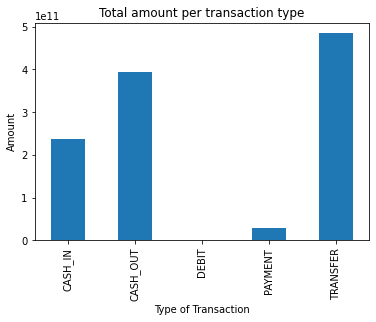

In [20]:
#Since there is no missing and garbage value, there is
#no need for data cleaning, but we still need to perform 
#data analysis as data contaion huge variation of the value in
#different columns. Normalization will also imporve the
#overall accuracy of the machine learning model.
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');


In [21]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

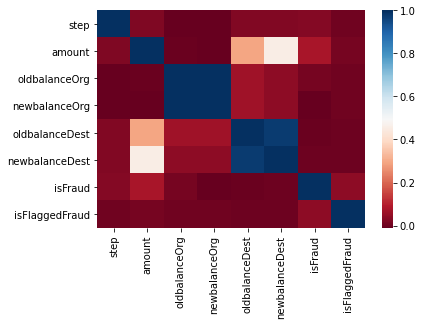

In [22]:
#The graph above shows that TRANSFER and CASH_OUT are
#two most used mode of transaction and we can see that TRANSFER
#and CASH_OUT are also the only way in which fraud happen. 
#Thus we will focus on this type of transactions.
sns.heatmap(data.corr(),cmap='RdBu');

In [23]:
#Things we can conclude from this heatmap:

#OldbalanceOrg and NewbalanceOrg are highly correlated.
#OldbalanceDest and NewbalanceDest are highly correlated.
#Amount is correlated with isFraud(Target Variable).
#There is not much relation between the features, so we need to
#understand where the relationship between them depends on the type
#of transaction and amount. To do so, we need to see the heat map of 
#fraud and nonfraud transactions differently.
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

In [24]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

In [26]:
print('The total number of fraud transaction is {}.'.format(data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [28]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


In [29]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

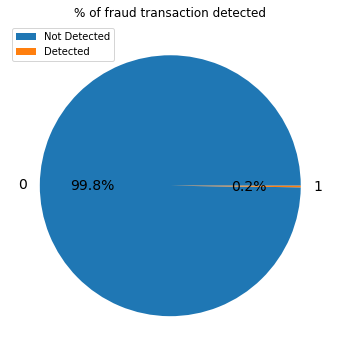

In [30]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

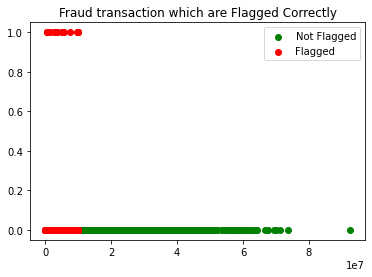

In [31]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

# Data Exploration

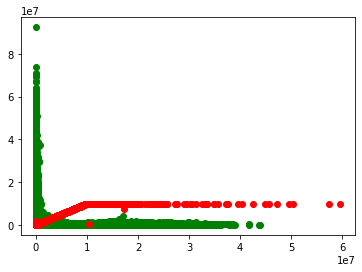

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()


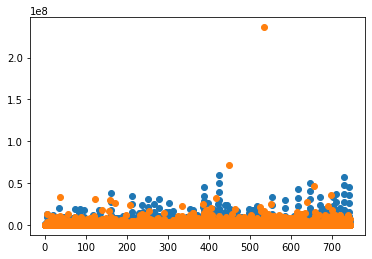

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

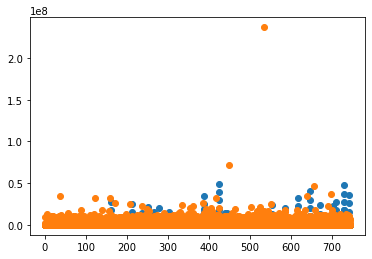

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

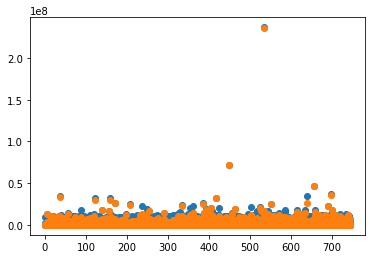

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

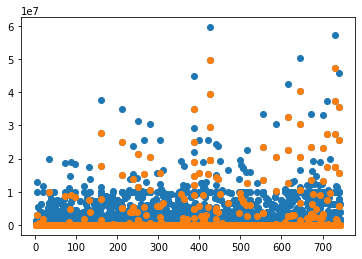

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

# Data Cleaning 

In [37]:
import pandas as pd
import numpy as np 
import pickle

In [38]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [40]:
data_fraud = pd.read_csv('fraud.csv')

In [41]:
data_fraud = data_fraud.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [42]:
data_fraud.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [43]:
data_fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [44]:
X = data_fraud.drop(['isFraud'],axis=1)
y = data_fraud[['isFraud']]

# Machine Learning Model 

In [45]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [47]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [48]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.7603667444465559
